In [1]:
import numpy as np

In [2]:
import sklearn

In [3]:
from sklearn.datasets import load_breast_cancer

In [48]:
data = load_breast_cancer()

In [49]:
X = data.data
y = data.target

In [6]:
import pandas as pd

In [13]:
df = pd.DataFrame(X, columns=data.feature_names)

In [8]:
pd.DataFrame(X, columns=data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
pd.Series(y).value_counts()

1    357
0    212
Name: count, dtype: int64

In [11]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='mean fractal dimension', ylabel='Count'>

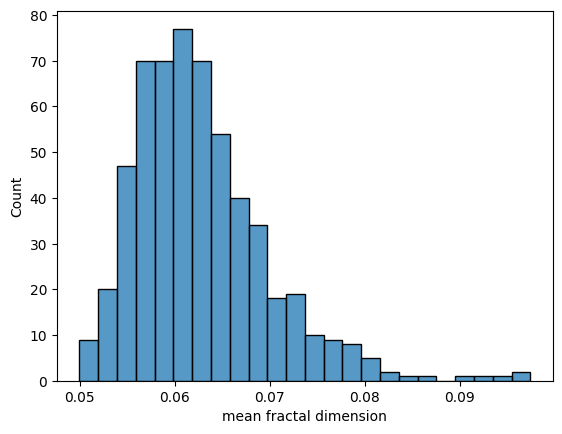

In [14]:
sns.histplot(df['mean fractal dimension'])

<Axes: xlabel='mean fractal dimension', ylabel='Count'>

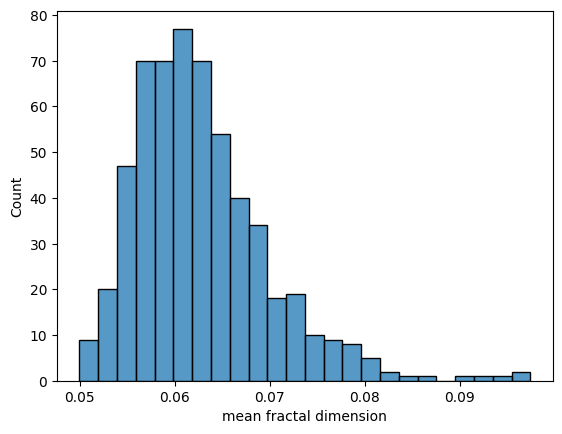

In [15]:
sns.histplot(data=df, x=df['mean fractal dimension'])

<Axes: xlabel='mean fractal dimension', ylabel='Count'>

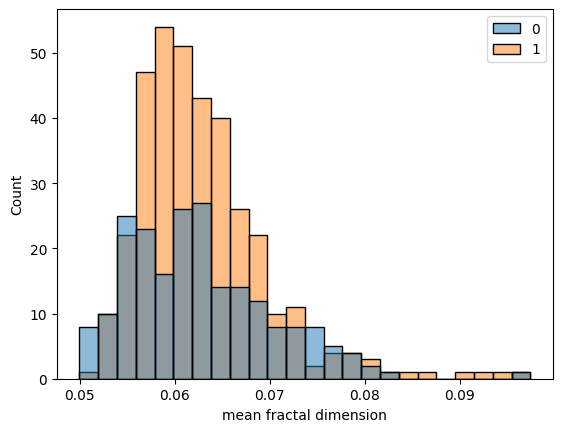

In [16]:
sns.histplot(data=df, x=df['mean fractal dimension'], hue=y)

In [50]:
X = np.hstack(
    (
        (
            np.ones(
                (
                    len(y),
                    1
                )
            )
        ),
        X
    )
)


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [53]:
X_train, y_train, X_test, y_test = train_test_split(X, y, random_state=0) # random_state=0 is like seed in random

In [85]:
# class LogisticRegression:
#     def __init__(self, learning_rate=0.01, num_iterations=1000):
#         self.learning_rate = learning_rate
#         self.num_iterations = num_iterations
#         self.weights = None
    
#     def fit(self, X, y):
#         num_samples, num_features = X.shape
        
#         self.weights = np.zeros(num_features)
        
#         for _ in range(self.num_iterations):
#             linear_model = np.dot(X, self.weights)
#             y_predicted = self.sigmoid(linear_model)
            
#             dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            
#             self. weights -= (self.learning_rate * dw)
    
#     def predict(self, X):
#         linear_model = np.dot(X, self.weights)
#         y_predicted = self.sigmoid(linear_model)
#         y_predicted_cls = [1 if p > 0.5 else 0 for p in y_predicted]
        
#         return y_predicted_cls
    
#     @staticmethod
#     def sigmoid(X):
#         return 1 / (1 + np.exp(-X))


# Pasted
data = load_breast_cancer()
X = data.data
y = data.target
X = np.hstack(
    (
        (
            np.ones(
                (
                    len(y),
                    1
                )
            )
        ),
        X
    )
)
X_train, X_test, y_train, y_test = train_test_split(X, y)
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights)
            y_predicted = self.sigmoid(linear_model)

            # Update weights and bias using gradient descent
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))

            self.weights -= self.learning_rate * dw

    def predict(self, X):
        linear_model = np.dot(X, self.weights)
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [86]:
model = LogisticRegression()

model.fit(X_train, y_train)

C:\Users\Amir\AppData\Local\Temp\ipykernel_17804\359605694.py:79: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [76]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression()

model.fit(X, y)

d:\dev\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
y_pred = model.predict(X_test)

C:\Users\Amir\AppData\Local\Temp\ipykernel_17804\359605694.py:79: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [88]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,